In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
from beam.beams import laserpulse
from beam.beams import laserbeam
from beam.elements import plasma
from beam.elements import optic
from beam import interactions
from ionization import ionization
from ionization import adk
from lens import profile
from lens import bessel
from propagation import laser
import matplotlib.pyplot as plt
from scipy import ndimage

path = '/media/robert/Data_Storage/Data/Experimental/1inAxicon/'

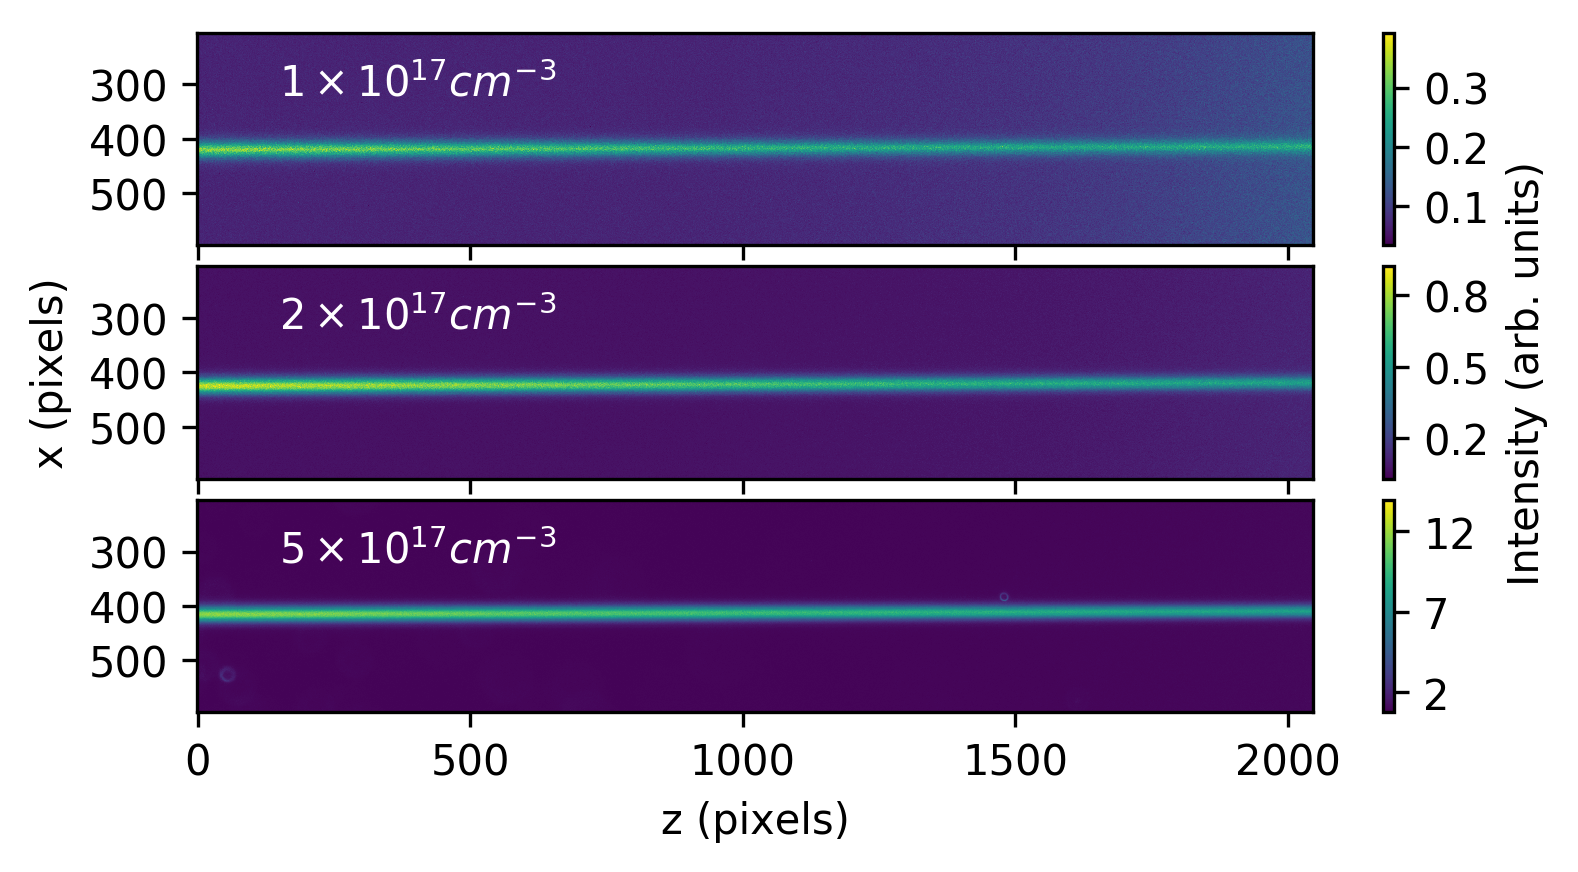

In [2]:
plasma1 = ndimage.imread(path+'Argon_Images/1e17PlasmaIncreasedPower.png', flatten=True)*10**(-23.697/10)
plasma2 = ndimage.imread(path+'Argon_Images/2e17PlasmaIncreasedPower.png', flatten=True)*10**(-23.697/10)
plasma5 = ndimage.imread(path+'Argon_Images/5e17PlasmaIncreasedPower.png', flatten=True)*10**(-12.298/10)
Ny, Nx = np.shape(plasma1)
fig = plt.figure(figsize=(6, 3), dpi=300)
ax1 = plt.subplot(311)
plt.imshow(plasma1)
plt.ylim(600, 200)
cb = plt.colorbar()
cb.set_ticks([0.1, 0.2, 0.3])
plt.text(150, 320, r'$1\times10^{17} cm^{-3}$', color='w')

ax2 = plt.subplot(312, sharex=ax1)
plt.imshow(plasma2)
plt.ylim(600, 200)
cb = plt.colorbar()
cb.set_ticks([0.2, 0.5, 0.8])
cb.set_label(r'Intensity (arb. units)')
plt.ylabel(r'x (pixels)')
plt.text(150, 320, r'$2\times10^{17} cm^{-3}$', color='w')

ax3 = plt.subplot(313, sharex=ax1)
plt.imshow(plasma5)
plt.ylim(600, 200)
cb = plt.colorbar()
cb.set_ticks([2, 7, 12])
plt.xlabel(r'z (pixels)')
plt.text(150, 320, r'$5\times10^{17} cm^{-3}$', color='w')

fig.subplots_adjust(hspace=0.1)
plt.setp([a.get_xticklabels() for a in fig.axes[:-2]], visible=False)
plt.show()

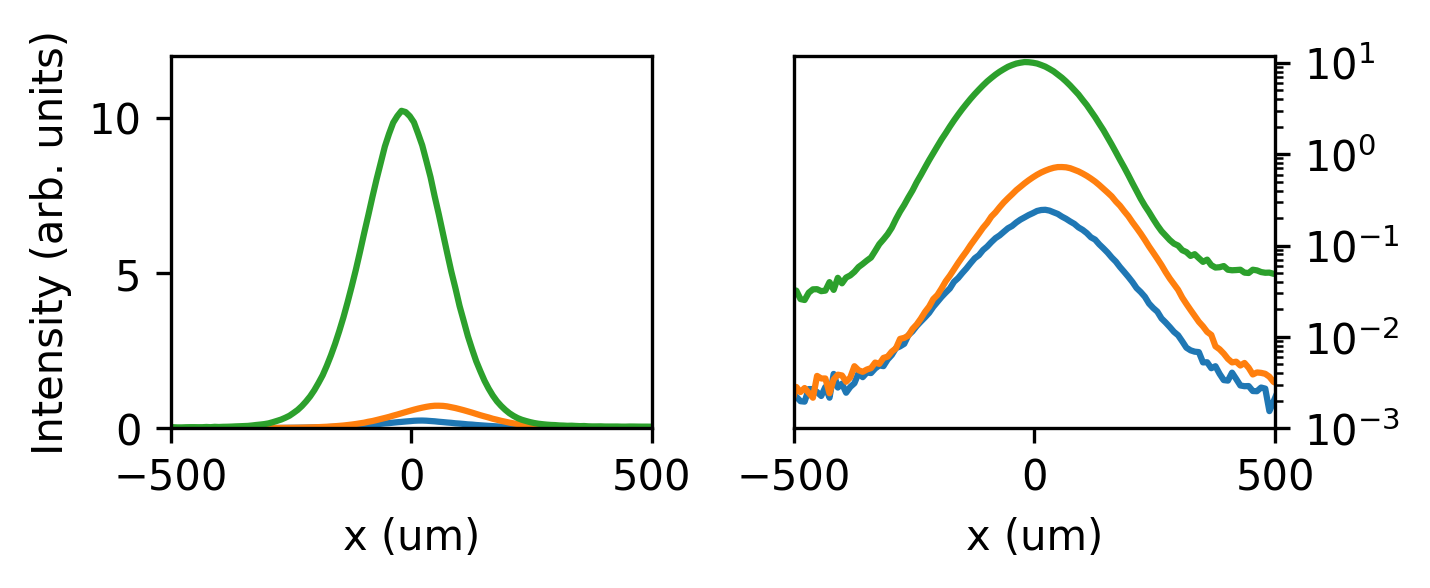

In [13]:
line1 = np.average(plasma1[:, 100:500], axis=1)
line2 = np.average(plasma2[:, 100:500], axis=1)
line5 = np.average(plasma5[:, 100:500], axis=1)
line1 -= np.amin(line1)
line2 -= np.amin(line2)
line5 -= np.amin(line5)

x = np.arange(0, Ny, 1)*3.45*2.5 - 3600
fig = plt.figure(figsize=(5, 2), dpi=300)
ax1 = plt.subplot(121)
plt.plot(x, line1)
plt.plot(x, line2)
plt.plot(x, line5)
plt.xlim(-500, 500)
plt.ylim(1e-3, 12)
plt.xlabel(r'x (um)')
plt.ylabel(r'Intensity (arb. units)')

ax2 = plt.subplot(122)
plt.plot(x, line1)
plt.plot(x, line2)
plt.plot(x, line5)
plt.xlim(-500, 500)
plt.ylim(1e-3, 12)
plt.yscale('log')
ax2.yaxis.tick_right()
plt.xlabel(r'x (um)')

plt.tight_layout()
plt.show()